## Utils

In [1]:
from Network import *

In [2]:
! python -c "import torch; print(torch.__version__)"

1.13.1+cu117


In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import pydot
from networkx.drawing.nx_pydot import graphviz_layout
import numpy as np
import wspd
import time


import torch
import torch_geometric
from torch_geometric.transforms import BaseTransform
from torch_geometric.data.datapipes import functional_transform

import networkx as nx
from functools import reduce


def make_binary_tree_graph(r, h):
    T = nx.balanced_tree(r, h)
    # print("Graph Nodes:", list(T.nodes))
    # print("Graph Edges:", list(T.edges))
    TT = nx.adjacency_matrix(T)
    # print("Adjacency Matrix:", TT.todense())

    # pos = graphviz_layout(T, prog="dot")
    # nx.draw(T, pos)
    # plt.show()

    matrix = nx.linalg.graphmatrix.adjacency_matrix(T).todense()
    print(type(matrix))
    matrix = np.array(matrix).astype(float)
    return matrix, T


def make_2d_graph(m, n, periodic=False, return_pos=False):
    network = nx.grid_2d_graph(m, n, periodic=False, create_using=None)
    matrix = nx.linalg.graphmatrix.adjacency_matrix(network).todense()
    matrix = np.array(matrix).astype(float)

    pos = graphviz_layout(network, prog="dot")
    nx.draw(network, pos)
    plt.show()

    return matrix, network


def make_path_graph(n):
    parent = [i for i in range(n-1)]
    children = [i+1 for i in range(n-1)]
    external = [1, n]

    P = nx.path_graph(n)

    # print("Parent:", parent)
    # print("Children:", children)
    # print("External:", external)
    # print("Graph Nodes:", list(P.nodes))
    # print("Graph Edges:", list(P.edges))
    # Adj_P = nx.adjacency_matrix(P)
    # print("Adjacency Matrix:", Adj_P.todense())

    pos = graphviz_layout(P, prog="dot")
    nx.draw(P, pos)
    plt.show()


    matrix = nx.linalg.graphmatrix.adjacency_matrix(P).todense()
    Adj_P = np.array(matrix).astype(float)
    # return Adj_P, parent, children, n, external
    return Adj_P, P

def calc_ef_embedding(graph):
  laplacian = torch.tensor(nx.laplacian_matrix(graph).todense().astype("float"))
  pinv = torch.linalg.pinv(laplacian, hermitian=True)
  squared_pinv = pinv @ pinv


  # The entries resistance_matrix[s,t] are the effective resistance  between s and t.
  pinv_diagonal = torch.diagonal(pinv)
  resistance_matrix = pinv_diagonal.unsqueeze(0) + pinv_diagonal.unsqueeze(1) - 2*pinv
  return resistance_matrix


## Path

/tmp/ipykernel_182487/3698167580.py:63: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(P, prog="dot")


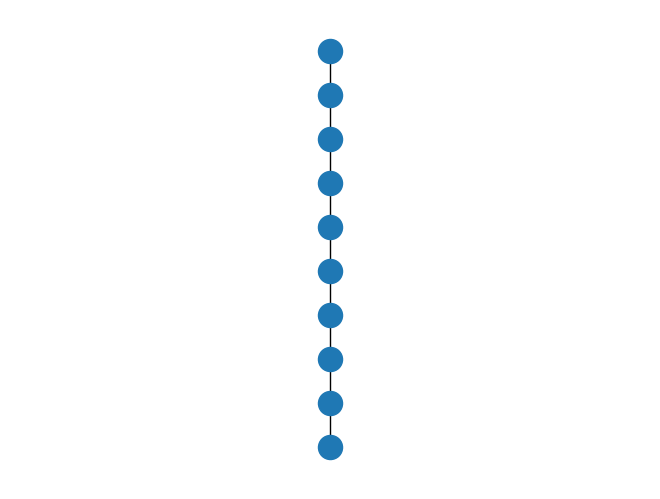

In [4]:
n= 10
adj_path, path_graph = make_path_graph(n)


In [6]:
ef_embedding_path = calc_ef_embedding(path_graph)
print(ef_embedding_path)

tensor([[0.0000, 1.0000, 2.0000, 3.0000, 4.0000, 5.0000, 6.0000, 7.0000, 8.0000,
         9.0000],
        [1.0000, 0.0000, 1.0000, 2.0000, 3.0000, 4.0000, 5.0000, 6.0000, 7.0000,
         8.0000],
        [2.0000, 1.0000, 0.0000, 1.0000, 2.0000, 3.0000, 4.0000, 5.0000, 6.0000,
         7.0000],
        [3.0000, 2.0000, 1.0000, 0.0000, 1.0000, 2.0000, 3.0000, 4.0000, 5.0000,
         6.0000],
        [4.0000, 3.0000, 2.0000, 1.0000, 0.0000, 1.0000, 2.0000, 3.0000, 4.0000,
         5.0000],
        [5.0000, 4.0000, 3.0000, 2.0000, 1.0000, 0.0000, 1.0000, 2.0000, 3.0000,
         4.0000],
        [6.0000, 5.0000, 4.0000, 3.0000, 2.0000, 1.0000, 0.0000, 1.0000, 2.0000,
         3.0000],
        [7.0000, 6.0000, 5.0000, 4.0000, 3.0000, 2.0000, 1.0000, 0.0000, 1.0000,
         2.0000],
        [8.0000, 7.0000, 6.0000, 5.0000, 4.0000, 3.0000, 2.0000, 1.0000, 0.0000,
         1.0000],
        [9.0000, 8.0000, 7.0000, 6.0000, 5.0000, 4.0000, 3.0000, 2.0000, 1.0000,
         0.0000]], dtype=tor

In [7]:
ef_embedding_path.type

<function Tensor.type>

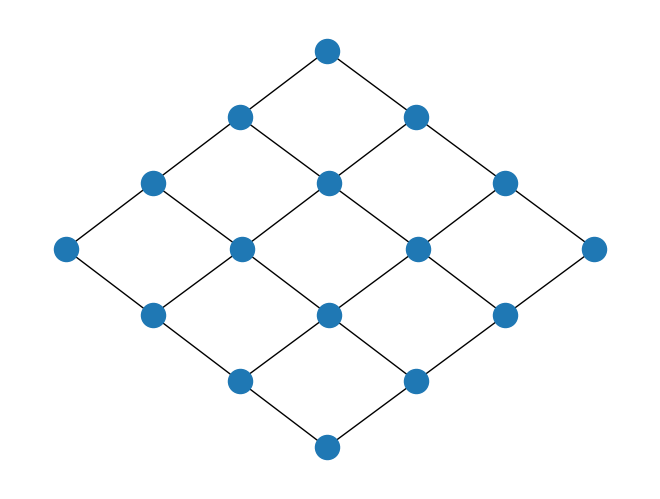

In [15]:
n = 4
m = 4
adj_grid, grid_graph = make_2d_graph(n,m)

In [20]:
network = Network(None, None, path_graph)

In [19]:
network

In [7]:
network = Network(None, None, path_graph)
epsilon=0.1
method='spl' #spl #ext
Effective_R , Z_embedding = network.effR(epsilon, method)
print(Effective_R)
print(Z_embedding)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[[ 0.04743416  0.20554805  0.04743416 -0.11067972  0.04743416 -0.11067972
   0.04743416 -0.11067972  0.04743416 -0.11067972]
 [ 0.23717082  0.39528471  0.23717082  0.07905694 -0.07905694 -0.23717082
  -0.39528471 -0.23717082 -0.07905694  0.07905694]
 [-0.14230249 -0.30041638 -0.14230249 -0.30041638 -0.14230249  0.01581139
   0.17392527  0.33203915  0.17392527  0.33203915]
 [-0.20554805 -0.04743416  0.11067972  0.2687936   0.11067972 -0.04743416
   0.11067972 -0.04743416 -0.20554805 -0.04743416]
 [-0.07905694  0.07905694 -0.07905694  0.07905694 -0.07905694  0.07905694
   0.23717082  0.07905694 -0.07905694 -0.23717082]
 [ 0.11067972  0.2687936   0.11067972 -0.04743416 -0.20554805 -0.36366193
  -0.20554805 -0.04743416  0.11067972  0.2687936 ]
 [-0.23717082 -0.07905694  0.07905694 -0.07905694  0.07905694  0.23717082
   0.07905694 -0.07905694  0.07905694 -0.07905694]
 [-0.33203915 -0.17392527 -0.33203915 -0.17392527 -0.01581139  0.14230249
  -0.01581139  0.14230

In [11]:
Z_emb_T = Z_embedding.transpose()
Z_emb_T.shape

(10, 40)

In [12]:
def get_and_add_box(dumbell_indices,boxes,data, i):
    l,r = dumbell_indices[i]
    # loop loop loop loop
    lbox = np.array([[min(x),max(x)] for x in data[l].T]).T
    rbox = np.array([[min(x),max(x)] for x in data[r].T]).T
    boxes.append([lbox,rbox])

def compute_centers(boxes, lcenters, rcenters, i):
    lc, rc = boxes[i]
    lcenters.append( (lc[0,:] + lc[1,:])/2)
    rcenters.append( (rc[0,:] + rc[1,:])/2)

In [13]:
S = 2.0 # separation constant

# Don't provide multiple copies of the same point in the data. The copies will get anyways removed in build_wspd() call.
data = np.array(Z_emb_T)
data_pts = data.tolist()


nr_pts = len(data_pts) # number of points
print("number of points: " f'{nr_pts}')
dim = len(data_pts[0]) # point dimension
print("point dimension: " f'{dim}')

data_pts = [wspd.point(p) for p in data_pts] # move points to point class objects

tic = time.perf_counter()
dumbells = wspd.build_wspd(nr_pts, dim, S, data_pts) # compute WSPD
toc = time.perf_counter()

print(f"WSPD construction in  {toc - tic:0.4f} seconds and size {len(dumbells)}")
print(dumbells)

number of points: 10
point dimension: 40
WSPD construction in  0.0012 seconds and size 35
[([3], [2]), ([3], [4]), ([2], [4]), ([1], [0]), ([3], [1]), ([2], [1]), ([3], [0]), ([2], [0]), ([4], [1]), ([4], [0]), ([7], [6]), ([7], [5]), ([6], [5]), ([8], [9]), ([7], [8]), ([6], [8]), ([7], [9]), ([6], [9]), ([5], [8]), ([5], [9]), ([3], [7]), ([3], [6]), ([2], [7, 6]), ([4], [7]), ([4], [6]), ([3], [5]), ([2], [5]), ([4], [5]), ([1, 0], [7, 6]), ([1], [5]), ([0], [5]), ([3, 2], [8, 9]), ([4], [8]), ([4], [9]), ([1, 0], [8, 9])]


## Grid

<ipython-input-27-72dc02e35509>:39: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which has known issues and is not actively maintained. Consider using nx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(network, prog="dot")


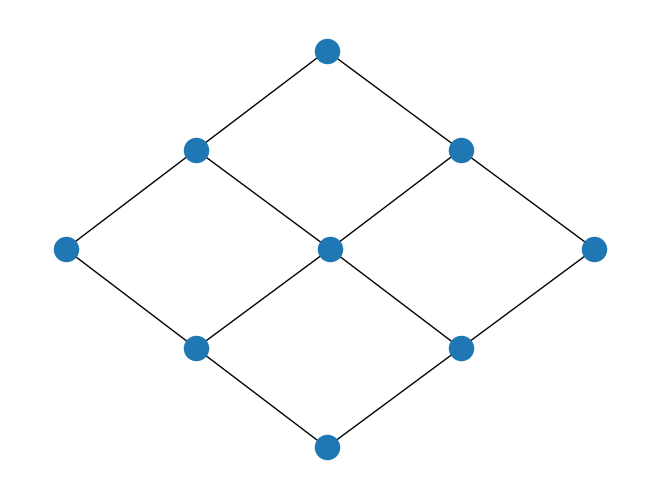

In [ ]:
n = 3
m = 3
adj_grid, grid_graph = make_2d_graph(n,m)

In [ ]:

ef_embedding_grid = calc_ef_embedding(grid_graph)
print(ef_embedding_grid)

tensor([[0.0000, 0.7083, 1.2500, 0.7083, 0.8750, 1.2083, 1.2500, 1.2083, 1.5000],
        [0.7083, 0.0000, 0.7083, 0.8333, 0.5833, 0.8333, 1.2083, 1.0000, 1.2083],
        [1.2500, 0.7083, 0.0000, 1.2083, 0.8750, 0.7083, 1.5000, 1.2083, 1.2500],
        [0.7083, 0.8333, 1.2083, 0.0000, 0.5833, 1.0000, 0.7083, 0.8333, 1.2083],
        [0.8750, 0.5833, 0.8750, 0.5833, 0.0000, 0.5833, 0.8750, 0.5833, 0.8750],
        [1.2083, 0.8333, 0.7083, 1.0000, 0.5833, 0.0000, 1.2083, 0.8333, 0.7083],
        [1.2500, 1.2083, 1.5000, 0.7083, 0.8750, 1.2083, 0.0000, 0.7083, 1.2500],
        [1.2083, 1.0000, 1.2083, 0.8333, 0.5833, 0.8333, 0.7083, 0.0000, 0.7083],
        [1.5000, 1.2083, 1.2500, 1.2083, 0.8750, 0.7083, 1.2500, 0.7083, 0.0000]],
       dtype=torch.float64)


In [ ]:
import numpy as np

def get_and_add_box(dumbell_indices,boxes,data, i):
    l,r = dumbell_indices[i]
    # loop loop loop loop
    lbox = np.array([[min(x),max(x)] for x in data[l].T]).T
    rbox = np.array([[min(x),max(x)] for x in data[r].T]).T
    boxes.append([lbox,rbox])

def compute_centers(boxes, lcenters, rcenters, i):
    lc, rc = boxes[i]
    lcenters.append( (lc[0,:] + lc[1,:])/2)
    rcenters.append( (rc[0,:] + rc[1,:])/2)

In [ ]:
S = 2.0 # separation constant

# Don't provide multiple copies of the same point in the data. The copies will get anyways removed in build_wspd() call.
data = np.array(ef_embedding_grid)
data_pts = data.tolist()

nr_pts = len(data_pts) # number of points
print("number of points: " f'{nr_pts}')
dim = len(data_pts[0]) # point dimension
print("point dimension: " f'{dim}')

data_pts = [wspd.point(p) for p in data_pts] # move points to point class objects

tic = time.perf_counter()
dumbells = wspd.build_wspd(nr_pts, dim, S, data_pts) # compute WSPD
toc = time.perf_counter()

print(f"WSPD construction in  {toc - tic:0.4f} seconds and size {len(dumbells)}")
print(dumbells)

number of points: 9
point dimension: 9
WSPD construction in  0.0003 seconds and size 36
[([8], [7]), ([8], [4]), ([7], [4]), ([8], [6]), ([7], [6]), ([4], [6]), ([5], [2]), ([8], [5]), ([8], [2]), ([7], [5]), ([7], [2]), ([4], [5]), ([4], [2]), ([6], [5]), ([6], [2]), ([0], [3]), ([0], [1]), ([3], [1]), ([8], [0]), ([8], [3]), ([7], [0]), ([7], [3]), ([8], [1]), ([7], [1]), ([4], [0]), ([4], [3]), ([4], [1]), ([6], [0]), ([6], [3]), ([6], [1]), ([5], [0]), ([5], [3]), ([2], [0]), ([2], [3]), ([5], [1]), ([2], [1])]
